In [1]:
print('abc')

abc


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


Loading the Dataset

In [3]:
import kagglehub

path = kagglehub.dataset_download("adityakadiwal/water-potability")

df = pd.read_csv(f"{path}/water_potability.csv")
X = df.drop("Potability", axis=1)
y = df[["Potability"]
]

d:\conda\envs\capstone\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [5]:
y.head()

,Potability
0,0
1,0
2,0
3,0
4,0


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
dtypes: float64(9)
memory usage: 230.5 KB


In [7]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Potability  3276 non-null   int64
dtypes: int64(1)
memory usage: 25.7 KB


In [8]:
print(X.describe().T)
print('\n')

print(y.describe().T)

                  count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20

In [9]:
y.isnull().sum()

Potability    0
dtype: int64

In [10]:
X.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
dtype: int64

#### EDA

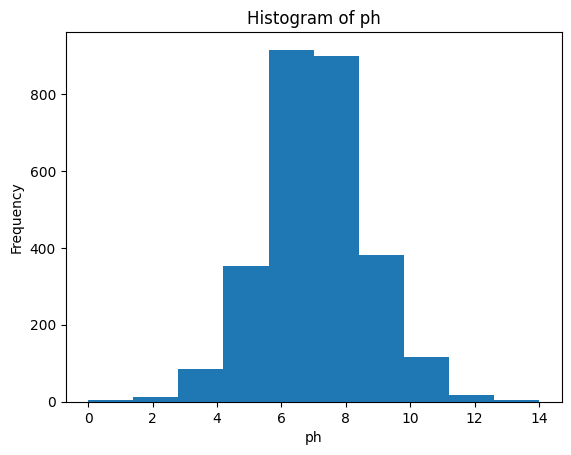

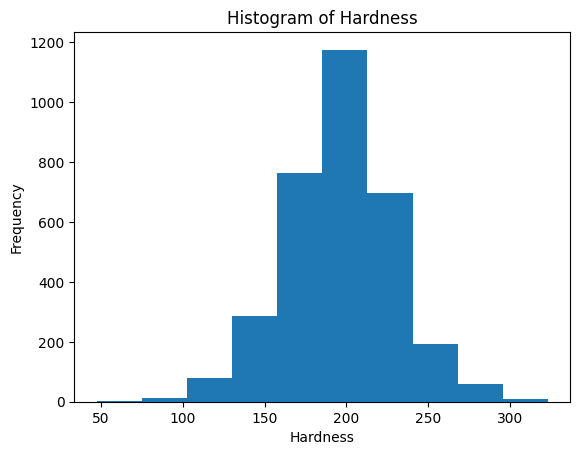

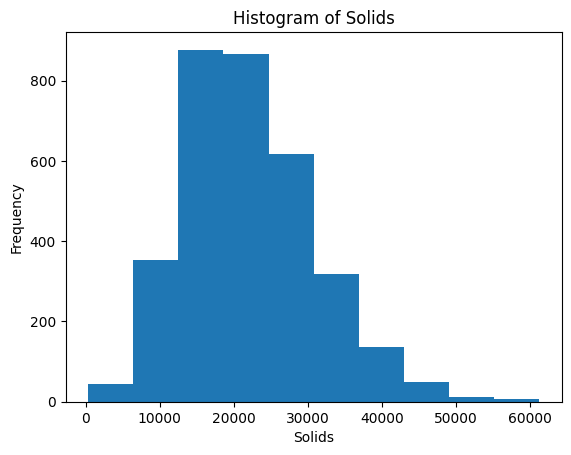

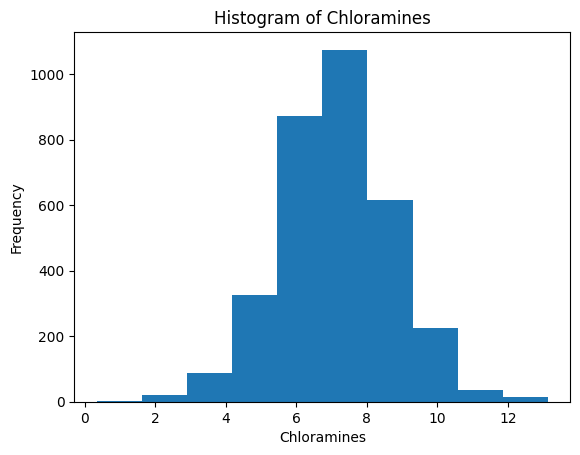

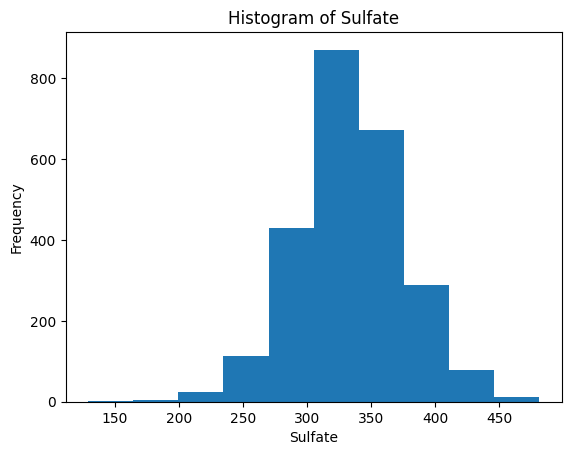

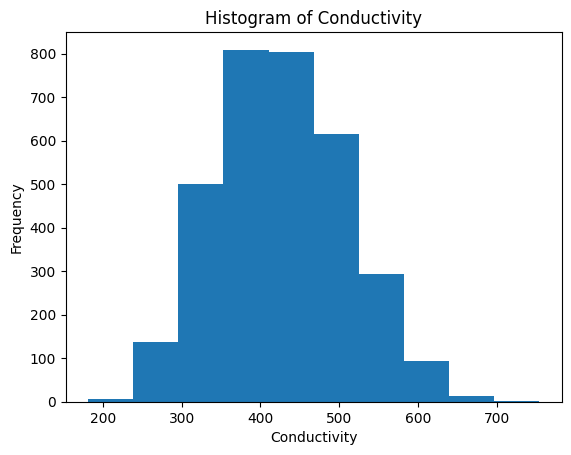

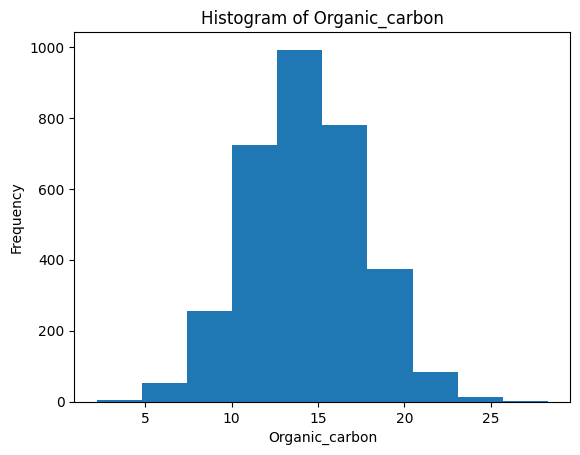

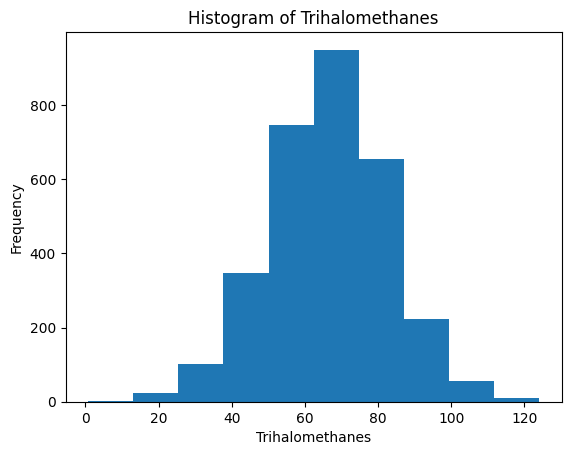

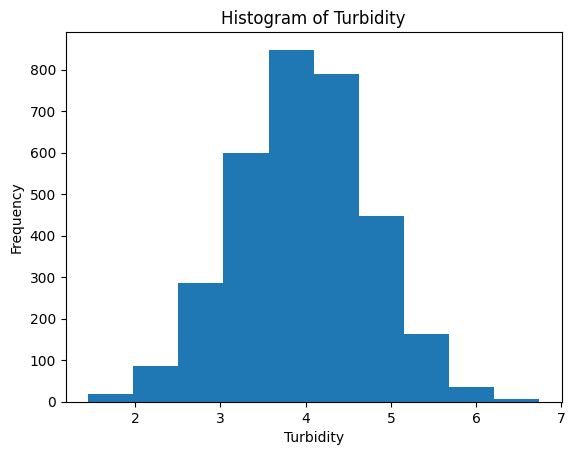

In [11]:
for col in X.columns: 
    plt.figure()
    plt.hist(X[col], bins = 10)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

The shape of the pH column is approximately normal. Therefore, the null values are replaced with the mean value. The same goes for Sulfate and Trihalomethanes columns.

In [12]:
cols = ['ph', 'Sulfate', 'Trihalomethanes']

preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='mean'), cols)
], remainder='passthrough')

In [13]:
X_filled = preprocessor.fit_transform(X)

In [14]:
X_transformed = pd.DataFrame(
    X_filled,
    columns=preprocessor.get_feature_names_out()
)

In [15]:
X_transformed.isnull().sum()

num__ph                      0
num__Sulfate                 0
num__Trihalomethanes         0
remainder__Hardness          0
remainder__Solids            0
remainder__Chloramines       0
remainder__Conductivity      0
remainder__Organic_carbon    0
remainder__Turbidity         0
dtype: int64

In [16]:
rename_map = {
    'num__ph': 'ph',
    'num__Sulfate': 'Sulfate',
    'num__Trihalomethanes': 'Trihalomethanes',
    'remainder__Hardness': 'Hardness',
    'remainder__Solids': 'Solids',
    'remainder__Chloramines': 'Chloramines',
    'remainder__Conductivity': 'Conductivity',
    'remainder__Organic_carbon': 'Organic_carbon',
    'remainder__Turbidity': 'Turbidity'
}

X_transformed = X_transformed.rename(columns=rename_map)

Plotting Correlations

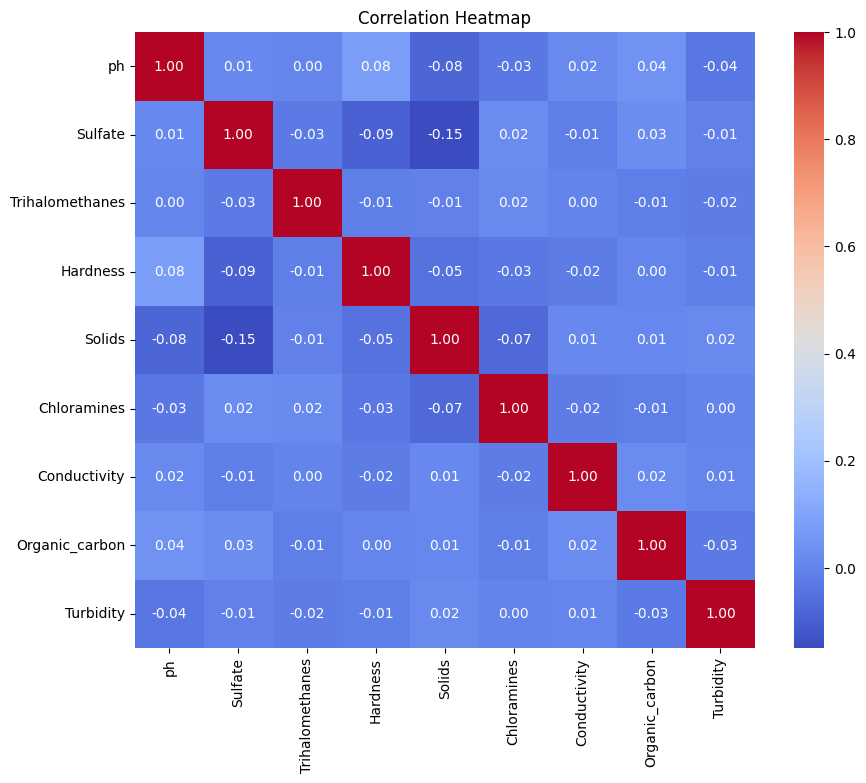

In [19]:
plt.figure(figsize=(10, 8))
# 'annot=True' adds the numbers, 'fmt=".2f"' rounds them to 2 decimal places
sns.heatmap(X_transformed.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

There is no multicollinearity among the predictor variables.

#### Model Building

In [21]:
preprocessor_scaling = ColumnTransformer(
    transformers=[
        ('num_scaling', StandardScaler(), cols)
    ],
    remainder='passthrough'
)

In [ ]:
models = {
    # Models that require scaling
    "KNN": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),
    
    "Logistic Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=500))
    ]),

    "SVM": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(kernel='rbf')) # 'rbf' is the default and usually best starting point
    ]),
    
    # Tree-based models (Scaling omitted)
    "Decision Tree": Pipeline(steps=[
        ('classifier', DecisionTreeClassifier())
    ]),
    
    "Random Forest": Pipeline(steps=[
        ('classifier', RandomForestClassifier())
    ]),
    
    "Gradient Boosting": Pipeline(steps=[
        ('classifier', GradientBoostingClassifier())
    ])
}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

results = {}

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

performance_metrics = []

for name, pipeline in models.items():
    pipeline.fit(X_train, y_train.values.ravel())
    
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    # Using average='weighted' handles potential class imbalance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append results to the list
    performance_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

In [42]:
results_df = pd.DataFrame(performance_metrics)
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.681402   0.670828  0.681402  0.653412
1    Gradient Boosting  0.658537   0.642429  0.658537  0.615711
2        Decision Tree  0.577744   0.593503  0.577744  0.583217
3                  KNN  0.541159   0.512879  0.541159  0.521899
4  Logistic Regression  0.628049   0.394445  0.628049  0.484562
5                  SVM  0.628049   0.394445  0.628049  0.484562


In [ ]:
param_grids = {
    "Random Forest": {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5]
    },
    "Gradient Boosting": {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5]
    },
    "Decision Tree": {
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__criterion': ['gini', 'entropy']
    }
}

In [48]:
tuned_results = []
best_estimators = {}

for name in ["Random Forest", "Gradient Boosting", "Decision Tree"]:
    grid_search = GridSearchCV(
        estimator=models[name], 
        param_grid=param_grids[name], 
        cv=5, 
        scoring='f1_weighted', 
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train.values.ravel())
    
    best_estimators[name] = grid_search.best_estimator_

    tuned_results.append({
        'Model': name,
        'Best CV Score': grid_search.best_score_,
        'Best Params': grid_search.best_params_
    })

tuned_df = pd.DataFrame(tuned_results)

In [49]:
final_comparison = []

for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    
    final_comparison.append({
        'Model': name,
        'Final Accuracy': accuracy_score(y_test, y_pred),
        'Final F1 Score': f1_score(y_test, y_pred, average='weighted')
    })

final_df = pd.DataFrame(final_comparison).sort_values(by='Final F1 Score', ascending=False)
print(final_df)

               Model  Final Accuracy  Final F1 Score
0      Random Forest        0.695122        0.669462
1  Gradient Boosting        0.638720        0.622930
2      Decision Tree        0.602134        0.589919


In [50]:
for name, model_info in zip(["Random Forest", "Gradient Boosting", "Decision Tree"], tuned_results):
    print(f"\n--- Optimized Hyperparameters for {name} ---")
    
    clean_params = {k.replace('classifier__', ''): v for k, v in model_info['Best Params'].items()}
    
    for param, value in clean_params.items():
        print(f"{param:25}: {value}")


--- Optimized Hyperparameters for Random Forest ---
max_depth                : None
min_samples_split        : 5
n_estimators             : 200

--- Optimized Hyperparameters for Gradient Boosting ---
learning_rate            : 0.2
max_depth                : 5
n_estimators             : 100

--- Optimized Hyperparameters for Decision Tree ---
criterion                : gini
max_depth                : 10
min_samples_split        : 5


--- Best Model: Random Forest ---
              precision    recall  f1-score   support

           0       0.70      0.89      0.79       412
           1       0.66      0.37      0.47       244

    accuracy                           0.70       656
   macro avg       0.68      0.63      0.63       656
weighted avg       0.69      0.70      0.67       656



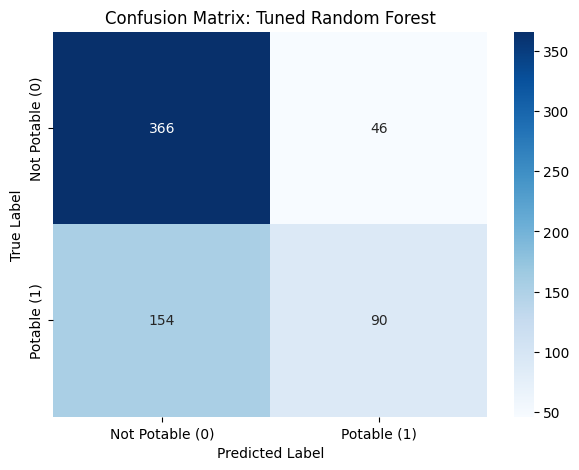

In [51]:
best_model = best_estimators["Random Forest"]
y_pred = best_model.predict(X_test)

print("--- Best Model: Random Forest ---")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Potable (0)', 'Potable (1)'], 
            yticklabels=['Not Potable (0)', 'Potable (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Tuned Random Forest')
plt.show()

#### ROC Curve

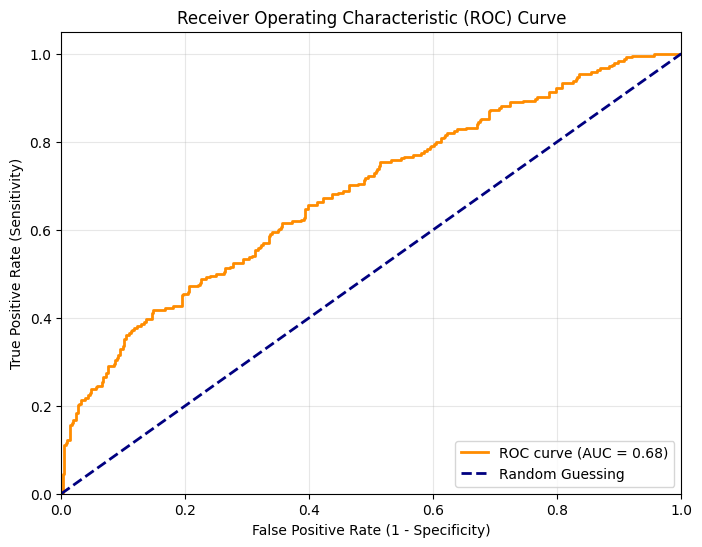

Final AUC Score: 0.6837


In [59]:
y_probs = best_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"Final AUC Score: {auc_score:.4f}")

#### Feature Importance

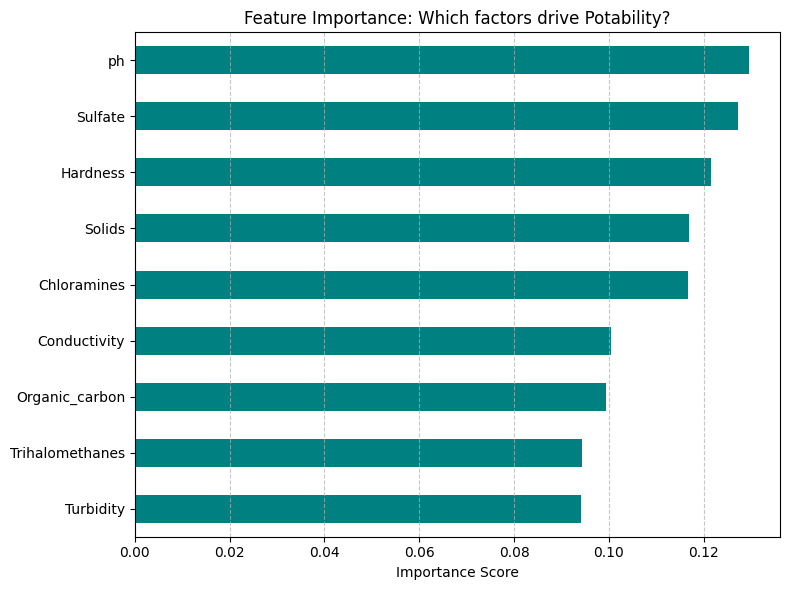

In [ ]:
feature_names = X_transformed.columns.to_list()
importances = best_model.named_steps['classifier'].feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
feat_imp.plot(kind='barh', color='teal')
plt.title('Feature Importance: Which factors drive Potability?')
plt.xlabel('Importance Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()